# Тест

In [ ]:
table_employees (Таблица сотрудников)

salary    bonus
2000      null
null      500
4500      1000
null      null
2000      300
3000      700

In [ ]:
Дана таблица с информацией о зарплатах сотрудников. В таблице хранится оклад (salary) и премия (bonus).

Необходимо определить результат следующих запросов:


SELECT min(salary) FROM table_employees = 2000
Верно. Минимальное ненулевое значение оклада равно 2000.

SELECT max(salary) FROM table_employees = 4500
Максимальное ненулевое значение оклада равно 4500.

SELECT sum(salary) FROM table_employees = 11500
Сумма всех ненулевых окладов: 2000 + 4500 + 2000 + 3000 = 11500

SELECT sum(1000) FROM table_employees = 600
Суммирует константное значение 1000 для каждой строки: 1000 * 6 = 6000

SELECT count(*) FROM table_employees = 6
Подсчитывает все строки в таблице: 6

SELECT count(1) FROM table_employees = 6
Подсчитывает все строки (аналогично count(*)): 6

SELECT count('salary') FROM table_employees = 6
Подсчитывает строковый литерал 'salary' для каждой строки (который никогда не бывает null): 6

SELECT count(salary) FROM table_employees = 4
Подсчитывает ненулевые значения оклада: 4 (две строки имеют null в столбце salary)

SELECT count(distinct salary) FROM table_employees = 3
Подсчитывает уникальные ненулевые значения оклада: 3 (2000 встречается дважды, 3000 и 4500)

SELECT sum(COALESCE(salary, 0)) FROM table_employees = 11500
Заменяет null-оклады на 0, затем суммирует: 2000 + 0 + 4500 + 0 + 2000 + 3000 = 11500

SELECT sum(salary + COALESCE(bonus, 0)) FROM table_employees = 13500
Для каждой строки складывает оклад с премией (считая null-премии как 0)
Учитываются только строки, где оклад не null
2000 + 0 + (4500 + 1000) + (2000 + 300) + (3000 + 700) = 13500


Задание 1.

Есть 2 таблицы A и B, в таблице A - 3 строки, а в таблице B - 5 строк.
Таблицей слева всегда будет A, таблицей справа - B.
В каждой из них только одна колонка - id. Значения в этой колонке могут быть любые (одинаковые, разные),  но не null.

Напишите минимальное и максимальное количество строк, которое можем получить в результате известных нам соединений.

In [ ]:
SELECT COUNT(*) FROM A INNER JOIN B ON A.id = B.id 
0/15

SELECT COUNT(*) FROM A LEFT JOIN B ON A.id = B.id 
3/15

SELECT COUNT(*) FROM A RIGHT JOIN B ON A.id = B.id 
5/15

SELECT COUNT(*) FROM A FULL JOIN B ON A.id = B.id 
5/15

SELECT COUNT(*) FROM A CROSS JOIN B 
15/15


Задание 2.

 Напишите запрос, который выведет сотрудников, у которых зарплата больше, чем у их менеджеров в таблице employee_salary. Примечание, у менеджера так же есть номер сотрудника id_employee в этой же таблице.

In [ ]:
id_employee	salary	id_manager
10	        155000	    11
11	        100000	    13
12	        95000	    13
13	        110000	    14
14	        150000	    null

In [ ]:
select t1.* from employee_salary t1 
left join employee_salary t2 on t1.id_manager = t2.id_employee
where t1.salary> t2.salary

Задание 3 Найдите разницу между зарплатой сотрудника и средней зарплатой его отдела.

employee_salaries (Таблица зарплат)
employee_name    department    salary
Иван            IT           70000
Мария           IT           85000
Петр            IT           65000
Анна            Sales        60000
Сергей          Sales        75000
Ольга           Sales        62000

In [ ]:
SELECT 
    employee_name,
    department,
    salary,
    AVG(salary) OVER (PARTITION BY department) as avg_dept_salary,
    salary - AVG(salary) OVER (PARTITION BY department) as diff_from_avg
FROM employee_salaries

### Блок 2

In [1]:
#синтетический df
#запустить!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

n = 500  # количество записей
dates = pd.date_range(start='2023-01-01', periods=n, freq='D')
user_ids = np.random.randint(1, 100, n)
action_types = np.random.choice(['click', 'purchase', 'login'], n)
client_platforms = np.random.choice(['iOS', 'Android', 'Web'], n)

# Создание DataFrame
data = {
    'time': dates,
    'user_id': user_ids,
    'action_type': action_types,
    'client_platform': client_platforms
}
df = pd.DataFrame(data)

# Вывод первых 5 строк данных
df.head()

time  user_id action_type client_platform
0 2023-01-01        2       login             Web
1 2023-01-02       28       click         Android
2 2023-01-03       79    purchase         Android
3 2023-01-04       73       click             Web
4 2023-01-05       88       click         Android

1. Найдите среднее количество действий на одного пользователя.

In [ ]:
df.groupby('user_id')['user_id'].count().mean()

5.1020408163265305

2. Подсчитайте, сколько пользователей использовали более одной платформы.

In [40]:
df.groupby('user_id', as_index = False).client_platform.nunique().query('client_platform > 1').client_platform.count()

90

3. Вывести количество уникальных пользователей, которые использовали платформу IOS в 2023 году

In [3]:
df.query('client_platform == "iOS" & time >= "2023-01-01" & time < "2024-01-01"').groupby('client_platform', as_index=False)['user_id'].nunique()

#df['month'] = df['time'].dt.month
#df_grouped = df.groupby(by = ['month', 'action_type']).user_id.nunique().reset_index()


#df[(df['time'] >= '2023-01-01')&(df['client_platform'] == 'iOS')]['user_id'].nunique()

82

4. Необходио визуализировать временной ряд, который отражает кол-во уникальных пользоватлей по каждому событию за каждый месяц, вне зависимости от платформы 

<Axes: xlabel='time'>

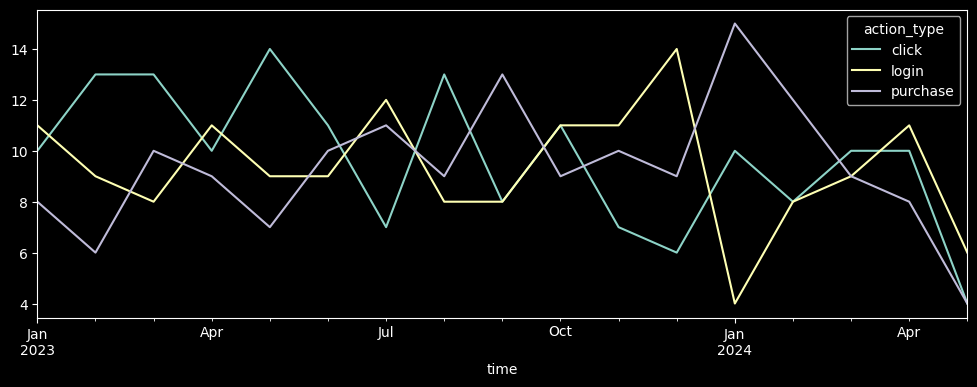

In [4]:

df_grouped = df.groupby([df['time'].dt.to_period('M'), 'action_type'])['user_id'].nunique().reset_index()
pivot_table = df_grouped.pivot(index='time', columns='action_type', values='user_id')
pivot_table.plot(kind = 'line', figsize=(12, 4))


#вариант 2
# df_grouped = df.groupby([df['time'].dt.to_period('M'), 'action_type'])['user_id'].nunique().reset_index()
# plt.figure(figsize=(12, 4))
# sns.barplot(x='time', y='user_id', hue='action_type', data=df_grouped)
# plt.title('временной ряд')
# plt.xlabel('месяц')
# plt.ylabel('юзеры')
# plt.xticks(rotation=45)
# plt.show()

#вариант 3 фи.
#plot = sns.lineplot(x = 'month', y = 'user_id', hue = 'action_type', data = df_grouped)
#plot.set(xlabel='Номер месяца', ylabel='Кол-во уникальных пользователей')

### Вопросы статистика


In [ ]:

1. **Что такое Центральная Предельная Теорема (ЦПТ)?** 

Ответ: Центральная Предельная Теорема утверждает, что при достаточно большом объеме выборки (обычно n ≥ 30) 
распределение выборочных средних будет приближаться к нормальному распределению, независимо от формы исходного распределения данных.
Практическое значение:
Позволяет применять параметрические методы статистики даже когда исходные данные не распределены нормально
Дает возможность строить доверительные интервалы для средних значений
Обосновывает применение многих статистических тестов (t-тест, z-тест)
Используется при планировании экспериментов и A/B тестов


2. **Меры центральной тенденции?**

Существуют следующие меры центральной тенденции:
Среднее значение (Mean): Сумма всех значений в наборе данных, деленная на их количество.
Медиана (Median): Серединное значение в упорядоченном наборе данных. Если количество значений нечетное, то медиана равна значению в середине. 
Если количество значений четное, то медиана равна среднему арифметическому двух значений в середине.
Мода (Mode): Значение, которое встречается наиболее часто в наборе данных.
Взвешенное среднее значение (Weighted Mean): Среднее значение, взвешенное с использованием различных весов для каждого значения.
Гармоническое среднее значение (Harmonic Mean): Обратное среднее значение суммы обратных значений в наборе данных.
Геометрическое среднее значение (Geometric Mean): Корень n-ой степени из произведения всех значений в наборе данных, где n - количество значений.
Квантили (Quartiles): Значение, разделяющее упорядоченный набор данных на четверти. Например, первый квантиль (Q1) - значение, которое оставляет 25% значений под ним.
Децили (Deciles) и процентили (Percentiles): Аналогично квантилям, децили и процентили разделяют набор данных соответственно на десятины и сотые доли.

2.2 Как считается медиана? 

2.1 Что такое процентиль?  
значение, которое делит упорядоченный набор данных на сотые доли. 1-й процентиль — это значение, ниже которого находится 1% данных, а не сам 1% данных.



3. В чем разница между корреляцией и причинно-следственной связью?
Ответ: Корреляция — это статистическая мера, которая показывает степень, в которой две переменные линейно связаны (изменяются вместе).
Причинно-следственная связь (каузальность) — это отношение, при котором одно событие (причина) вызывает другое (следствие).

Ключевые различия:
Корреляция показывает только связь, но не направление влияния
"Correlation does not imply causation" (Корреляция не означает причинность)
Корреляция может возникать из-за:
Прямой причинности (A → B)
Обратной причинности (B → A)
Общей причины (C → A и C → B)
Случайного совпадения
Скрытых переменных
Пример: Корреляция между продажами мороженого и количеством утонувших не означает, что мороженое вызывает утопления. 
Обе переменные зависят от третьей — жаркой погоды.

Как отличить корреляцию от причинно-следственной связи? Какие критерии помогают установить причинность?»
Ответ:
Корреляция — это статистическая взаимосвязь между двумя переменными (когда изменение одной сопровождается изменением другой).
Пример: Чем больше людей покупает мороженое, тем чаще случаются солнечные ожоги.
Причинно-следственная связь — когда одно явление (причина) непосредственно вызывает другое (следствие).
Пример: Воздействие ультрафиолета (причина) → солнечный ожог (следствие).



4. Какие методы поиска выбросов вы знаете?
1. **Метод межквартильного размаха (IQR)**: Этот метод использует межквартильный размах (разница между 75-м и 25-м перцентилями) для определения выбросов. Значения, находящиеся за пределами диапазона $Q1 - 1.5 \times IQR$ и $Q3 + 1.5 \times IQR$, считаются выбросами.
2. **Z-оценка**: Z-оценка показывает, насколько отклонение данного значения от среднего значения в единицах стандартного отклонения. Обычно значения, с Z-оценкой за пределами диапазона [-3, 3], считаются выбросами.
3. **Метод обнаружения выбросов на основе машинного обучения**: Методы машинного обучения, такие как Isolation Forest, Local Outlier Factor (LOF) и One-Class SVM, могут использоваться для обнаружения выбросов в данных на основе особенностей их распределения.
4. **Графические методы**: Box plot (ящик с усами) и Scatter plot могут помочь визуально обнаружить выбросы в данных.



5. Что такое стандартное отклонение?
Стандартное отклонение (σ) - это мера рассеяния или разброса значений случайной величины относительно ее среднего значения.
Оно показывает, насколько в среднем отдельные значения отклоняются от среднего. Чем больше стандартное отклонение, тем больше разброс значений вокруг среднего.
Формула для расчета выборочного стандартного отклонения:
s = √(Σ(x - x̄)^2 / (n-1))
Где: x - значения выборки x̄ - выборочное среднее n - объем выборки
Интерпретация стандартного отклонения:
Для нормального распределения:
Около 68% значений лежат в интервале (μ - σ, μ + σ)
Около 95% значений лежат в интервале (μ - 2σ, μ + 2σ)
Около 99.7% значений лежат в интервале (μ - 3σ, μ + 3σ)
Где μ - среднее генеральной совокупности.
Чем меньше σ, тем более сконцентрированы значения вокруг среднего.
Стандартное отклонение имеет ту же размерность, что и исходные данные (единицы измерения).
Оно используется для сравнения рассеяния в разных выборках/совокупностях.
Таким образом, стандартное отклонение количественно характеризует разброс значений случайной величины относительно ее среднего значения. Оно широко применяется в статистическом анализе для описания изменчивости данных.



55. Что такое нулевая гипотеза?
Между выборками нет значимых отличий, которые нельзя было бы обьяснить случайностью или ошибкой выборки. 
(прим. переводчика: важно подметить это лишь одна из возможных нулевых гипотез. Тем не менее, используется часто)



6. Как вы объясните что такое p-value человеку, который не знаком с этим термином?
Простое определение:
p-value (p-значение) – это вероятность получить такие же или более крайние результаты эксперимента, если на самом деле никакого эффекта нет (нулевая гипотеза верна).

Предположим, что мы проводим A/B тест некоторой рекламной кампании. В этом тесте у нас есть две гипотезы. 
Нулевая гипотеза заключается в том, что наша рекламная кампания не приносит измеримого прироста числа ежедневных активных пользователей. 
Гипотеза, которую мы тестируем - что наша рекламная кампания приносит измеримый вклад в число ежедневных пользователей. 
Затем мы будем использовать данные для того, чтобы провести тест и понять, какая гипотеза верна. 
P-value может помочь нам определить это, отражая вероятность того, что мы наблюдали бы текущие данные, если нулевая гипотеза верна. 
Важно иметь в виду, что это просто утверждение по поводу вероятности c учётом предположения, 
p-value не отвечает на вопрос "с какой вероятностью нулевая гипотеза верна" и не означает "с какой вероятностью наши наблюдения связаны со случайностью", 
как это ошибочно считают некоторые. 
Единственное, что может сказать p-значение - это то, насколько вероятно, что мы получили бы данные, которые получили, если бы нулевая гипотеза была верна. 
Разница на первый взгляд может казаться очень абстрактной и непрактичной, но использование некорректных объяснений способствует культовому поклонению p-value в нетехнических кругах. 
Таким образом, маленькое значение p-value показывает насколько маловероятно что мы получим такие данные [прим. переводчика: или более экстремальные] в ситуации,
когда нулевая гипотеза верна.



1. Что такое A/B тест и зачем его проводят?
🔍 Что проверяет: понимает ли саму идею — сравнить 2 варианта, чтобы увидеть, какой лучше.
Хороший ответ:
A/B тест — это способ сравнить два варианта (например, старую и новую кнопку) и понять, какой из них работает лучше. Мы случайно делим пользователей на 2 группы и сравниваем их поведение — например, кто чаще покупает.


2. Что важно проверить перед запуском A/B теста?
🔍 Проверяет, понимает ли базовую гигиену экспериментов.

Ожидаемое:
Группы должны быть похожи
Нужна основная метрика
Нужна достаточная выборка
Нельзя менять что-то ещё параллельно

5. Что может пойти не так в A/B тесте?
🔍 Проверяет здравый смысл.

Примеры:
Неправильно поделили пользователей
Недостаточно людей/времени
Появились баги
Изменилось поведение пользователей не из-за теста, а из-за внешних факторов (например, скидка, выходные)


7. Нужно ли завершать A/B тест, если через 2 дня видно, что одна группа лучше?
🔍 Проверяет понимание: не делать поспешные выводы.

Хороший ответ:
Нет, нужно дать тесту пройти достаточно времени. Иначе вывод может быть случайным. Лучше заранее посчитать, сколько данных надо собрать.







5. Зачем нам вообще нужна  ГКГ? 
| "Чтобы понимать, как ведут себя клиенты без всяких наших экспериментов и акций. Как бы 'фон'. 
Это поможет:  • Видеть, не портим ли мы что-то глобально. Правильнее оценивать наши обычные тесты (A/B).  
Заметить неожиданные проблемы в продукте." 



6. Маркетинг хочет дать скидку ВСЕМ клиентам. Можно ли использовать ГКГ для оценки? |
"НЕТ! ГКГ должна быть изолирована от ВСЕХ глобальных акций. Ее цель – показывать 'чистый' фон.  
Как оценить акцию? Создать временную большую контрольную группу (но это сложно/дорого) или сравнить с прошлым периодом (менее точно)." |



мат ожидание кубика?






### Вопросы
SQL 

In [ ]:
1. Типы джойнов?
1.1 self join
1.2 что такое cross join?

2. Какие типы оконных фунцкций существуют?
(Функции ранжирования, Аналитические функции, Функции агрегирования, Функции распределения, Функции смещения)


3. Как оптимизировать медленный запрос?
Ответ:
Анализ плана выполнения запроса:

Использовать EXPLAIN или EXPLAIN ANALYZE для анализа плана выполнения
Выявить операции полного сканирования таблиц (full table scan)
Найти узкие места (bottlenecks)
Оптимизация индексов:

Создать индексы для столбцов в условиях WHERE, JOIN, ORDER BY, GROUP BY
Использовать составные индексы для часто встречающихся комбинаций условий
Проверить, используются ли существующие индексы
Переписать запрос:

Избегать функций в условиях WHERE (они препятствуют использованию индексов)
Заменить подзапросы на JOIN, где это возможно
Использовать CTE (Common Table Expressions) вместо сложных подзапросов
Избегать SELECT * и выбирать только нужные столбцы
Оптимизация соединений:

Соединять таблицы в порядке от меньшей к большей
Использовать правильные типы соединений
Минимизировать количество соединений
Если не хватает оперативной памяти:

Разбить запрос на несколько меньших запросов
Использовать временные таблицы для хранения промежуточных результатов
Применить партиционирование таблиц
Использовать пагинацию (LIMIT/OFFSET) для обработки данных порциями
Настроить параметры базы данных (work_mem, sort_mem и т.д.)
Рассмотреть возможность вертикального или горизонтального масштабирования


4. Что такое индексы и как они влияют на производительность запросов?

Ответ: Индексы - это специальные структуры данных, которые ускоряют поиск информации в таблицах, подобно указателю в книге.

Типы индексов:

B-Tree - стандартный тип, подходит для большинства случаев (=, <, >, BETWEEN, LIKE 'abc%')
Hash - быстрый поиск по точному соответствию (=)
GiST/GIN - для полнотекстового поиска и сложных типов данных
Bitmap - для запросов с несколькими условиями фильтрации
Covering - включает все столбцы запроса, позволяя избежать обращения к таблице
Влияние на производительность:

Положительное:

Ускоряют поиск данных (WHERE)
Ускоряют сортировку (ORDER BY)
Ускоряют соединения таблиц (JOIN)
Ускоряют поиск MIN/MAX значений
Обеспечивают уникальность данных (UNIQUE)
Отрицательное:

Замедляют операции INSERT, UPDATE, DELETE (индексы нужно обновлять)
Занимают дополнительное дисковое пространство
Требуют дополнительных ресурсов для обслуживания
Когда индексы неэффективны:

Таблица очень маленькая
Запрос возвращает большую часть таблицы (>20-30%)
Столбцы часто обновляются
Столбцы имеют низкую кардинальность (мало уникальных значений)


5. Как вы бы определили, какие столбцы нужно проиндексировать?
Анализ запросов: Изучение наиболее часто используемых запросов и условий фильтрации. Столбцы, которые часто используются в условиях WHERE, JOIN или ORDER BY, являются хорошими кандидатами для индексирования.
Уникальность данных: Столбцы с высокой степенью уникальности данных (например, первичные ключи или уникальные индексы) обычно выгодно индексировать, так как это позволяет быстро находить отдельные записи.
Частота изменений данных: Столбцы с редко изменяющимися данными лучше подходят для индексирования, чем столбцы с частыми изменениями, так как обновление индексов может замедлить операции записи.
Размер данных: Для очень больших таблиц индексирование может быть более важным, чем для небольших таблиц, так как оно позволяет избежать полного сканирования данных.
Комбинированные индексы: Если часто используются запросы с несколькими условиями фильтрации, можно создать комбинированный индекс, включающий несколько столбцов.
Мониторинг производительности: Анализ медленных запросов и выявление "узких мест" в производительности, которые могут быть устранены с помощью индексирования.


6. Какие еще методы оптимизации запроса существуют? 

(
1. Индексирование: создание индексов на столбцах, которые часто используются в условиях WHERE, ORDER BY или JOIN. Индексы позволяют быстро находить нужные данные, не просматривая всю таблицу.
2. Денормализация данных: иногда может быть полезно денормализовать данные, то есть дублировать некоторую информацию в таблицах, чтобы избежать сложных соединений.
3. Разделение больших таблиц: если у вас есть очень большие таблицы, их можно разделить на несколько меньших таблиц, что может улучшить производительность.
4. Использование временных таблиц: если вам нужно выполнять одни и те же сложные запросы несколько раз, может быть полезно сохранить результаты в временной таблице и работать с ней.
5. Оптимизация запросов: проанализируйте свои запросы и убедитесь, что они не выполняют лишних операций. Например, избегайте использования функций в условиях WHERE или JOIN, если это возможно.
6. Использование подзапросов: иногда подзапросы могут быть более эффективными, чем сложные соединения.
7. Кэширование результатов запросов: если вы часто выполняете одни и те же запросы, может быть полезно кэшировать их результаты.
8. Партиционирование таблиц: разделение больших таблиц на более мелкие части (партиции) может улучшить производительность для определенных типов запросов.
9. Использование индексированных представлений: представления, основанные на индексах, могут значительно ускорить выполнение некоторых запросов.
10. Мониторинг и анализ производительности: регулярный мониторинг и анализ производительности SQL-запросов позволяет выявлять "узкие места" и своевременно их устранять.)




### Python


In [ ]:


0. Какие библиотеки Python вы используете для анализа данных?

1. Типы данных в python?

В Python существует несколько основных типов данных:

Числа:

Целые числа (int): положительные и отрицательные целые числа, например, 1, -10, 100.

Вещественные числа (float): числа с плавающей точкой, например, 3.14, -2.5, 1e-5.

Строки (str): последовательность символов, заключенных в кавычки (одинарные или двойные), например, "Hello", 'World'.

Булевы значения (bool): логические значения True (истина) и False (ложь). Используются для логических операций и условных выражений.

Списки (list): упорядоченные изменяемые коллекции объектов (разных типов), заключенные в квадратные скобки и разделенные запятой, например, [1, 2, 3, "hello"].

Кортежи (tuple): упорядоченные неизменяемые коллекции объектов (разных типов), заключенные в круглые скобки и разделенные запятой, например, (1, 2, 3, "hello").

Множества (set): неупорядоченные коллекции уникальных объектов, заключенные в фигурные скобки, например, {1, 2, 3}.

Словари (dict): неупорядоченные коллекции пар ключ-значение, заключенные в фигурные скобки, например, {"name": "John", "age": 25}.



2. Какие типы данных в питоне изменяемые, а какие нет?

Числа (int, float, complex)
Строки (str)
Кортежи (tuple)
Фроузен-множества (frozenset)
Булевы значения (bool)
Неизменяемые объекты нельзя изменить после их создания. Если вы попытаетесь изменить неизменяемый объект, Python создаст новый объект с новым значением, а старый объект будет удален.

Изменяемые типы данных:
Списки (list)
Словари (dict)
Множества (set)
Байтовые массивы (bytearray)
Изменяемые объекты можно изменять после их создания, добавляя, удаляя или заменяя их элементы.



2. Чем отличается tuple от list? 
Главное отличие между tuple (кортеж) и list (список) в Python заключается в их изменяемости и способе представления данных. Вот некоторые основные различия:
Изменяемость: Значения в кортеже не могут быть изменены после его создания, тогда как значения в списке могут быть изменены. Кортежи являются неизменяемыми (immutable), в то время как списки изменяемы.
Синтаксис: Значения в кортеже разделяются запятыми и заключаются в круглые скобки, например, (1, 2, 3). Списки имеют элементы, разделенные запятыми и заключенные в квадратные скобки, например, [1, 2, 3].
Использование: Кортежи обычно используются для хранения и представления неизменяемых и неизменяемых коллекций данных, таких как координаты, набор констант или аргументы функции. Списки используются для динамически изменяемых и упорядоченных коллекций данных.
Производительность: Из-за своей изменяемости и различных методов, работа со списками может занимать больше памяти и времени (например, при добавлении, удалении и сортировке элементов). Но кортежи, будучи неизменяемыми, могут быть немного более эффективными.
Использование памяти: Кортежи, как неизменяемые структуры данных, занимают меньше памяти по сравнению со списками, главным образом из-за отсутствия необходимости хранения информации об изменяемости элементов



3. Отличие множества от кортежа?

Set (Множество):
Множество - это неупорядоченная коллекция уникальных элементов.
Элементы множества не имеют индексов или порядка.
Одно и то же значение не может присутствовать в множестве дважды.
Основные операции над множествами: объединение, пересечение, разность, проверка принадлежности.
Множества часто используются для удаления дубликатов из коллекции элементов.
Tuple (Кортеж или Упорядоченная пара):

Кортеж - это упорядоченная коллекция элементов.
Элементы кортежа имеют фиксированный порядок и индексы.
Один и тот же элемент может встречаться в кортеже несколько раз.
Кортежи неизменяемы (immutable), т.е. после создания их элементы нельзя изменить.
Кортежи часто используются для представления записей или структур данных, где порядок элементов важен.








4. Чем отличается series от dataframe?
В целом, Series является структурой данных, предназначенной для хранения одномерных данных, тогда как DataFrame - для хранения двумерных данных в табличной форме с множеством колонок.


Series и DataFrame - это две основные структуры данных, которые предоставляет библиотека Pandas в Python для работы с табличными данными.
Основные отличия между Series и DataFrame:
Series: - Series представляет собой одномерный лейбелированный массив данных. - Она может содержать данные любого типа (числа, строки, булевы значения, объекты и т. д.). - Имеет одну ось (axis), ось меток (axis labels) - индекс. - Имеет встроенные методы и функциональность для манипуляций с данными, такие как фильтрация, сортировка, агрегация и операции математического преобразования.
DataFrame: - DataFrame представляет собой двумерную структуру данных, таблицу, состоящую из множества колонок (Series). - Она может содержать данные разных типов в разных колонках. - Имеет две оси - ось индексов (row index) и ось колонок (column index). - Предлагает удобный способ работы с данными, такой как фильтрация, сортировка, преобразование и анализ данных. - Позволяет объединять, преобразовывать и агрегировать данные с использованием мощных функций индексирования и группировки.





Кейс. Как обрабатывать пропущенные значения в pandas?

1. Обнаружение пропущенных значений
# Проверка наличия пропущенных значений
df.isna()  # или df.isnull() - возвращает булеву маску
df.isna().sum()  # количество пропущенных значений в каждом столбце
df.isna().any()  # есть ли пропущенные значения в столбцах


2. Удаление пропущенных значений
# Удаление строк с пропущенными значениями
df.dropna()  # удаляет строки, где есть хотя бы одно пропущенное значение
df.dropna(subset=['column1', 'column2'])  # удаляет строки с пропусками в указанных столбцах
df.dropna(how='all')  # удаляет только строки, где все значения пропущены
df.dropna(axis=1)  # удаляет столбцы с пропущенными значениями


3. Заполнение пропущенных значений
# Заполнение константой
df.fillna(0)  # заполняет все пропуски нулями
df['column'].fillna('Unknown')  # заполняет пропуски в конкретном столбце

# Заполнение статистиками
df.fillna(df.mean())  # заполнение средним значением
df.fillna(df.median())  # заполнение медианой
df.fillna(df.mode().iloc[0])  # заполнение модой

# Заполнение методом прямого/обратного заполнения
df.fillna(method='ffill')  # forward fill - заполнение предыдущим значением
df.fillna(method='bfill')  # backward fill - заполнение следующим значением

# Интерполяция
df.interpolate()  # линейная интерполяция
df.interpolate(method='polynomial', order=2)  # полиномиальная интерполя



5. Какая команда используется для для объеденения данных